<h1>Heart Disease Prediction</h1>

Used Algorithms: KNeighborsClassifier - RandomForestClassifier

<h2>1. Import Libraries and Dataset</h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data =  pd.read_csv('heart.csv')

<h2>2. Check dataset </h2>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<ul>
    <li>age</li>
    <li>sex</li>
    <li>cp: chest pain type (4 values)
    <ul>
        <li>0: typical angina </li>
        <li>1: atypical angina </li>
        <li>2: non-anginal pain </li>
        <li>3: asumptomatic </li>
    </ul>
    </li>
    <li>trestbps: resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li>chol: serum cholestoral in mg/dl</li>
    <li>fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li>restecg: resting electrocardiographic results
    <ul>
        <li>0: normal </li>
        <li>1: having ST-T wave abnormality </li>
        <li>2: showing probable or definite left ventricular hypertrophy by Estes' criteria </li>
    </ul>
    </li>
    <li>thalach: maximum heart rate achieved</li>
    <li>exang: exercise induced angina (1= yes; 0 = no)</li>
    <li>oldpeak: ST depression induced by exercise relative to rest</li>
    <li>slope: the slope of the peak exercise ST segment
    <ul>
        <li>1: upsloping </li>
        <li>2: flat </li>
        <li>3: downsloping</li>
    </ul>
    </li>
    <li>ca: number of major vessels (0-3) colored by flourosopy </li>
    <li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect </li>
    <li>target: 0 = less chance of heart attack; 1 = more chance of heart attack</li>
</ul>

<h2>3. Feature Selection</h2>

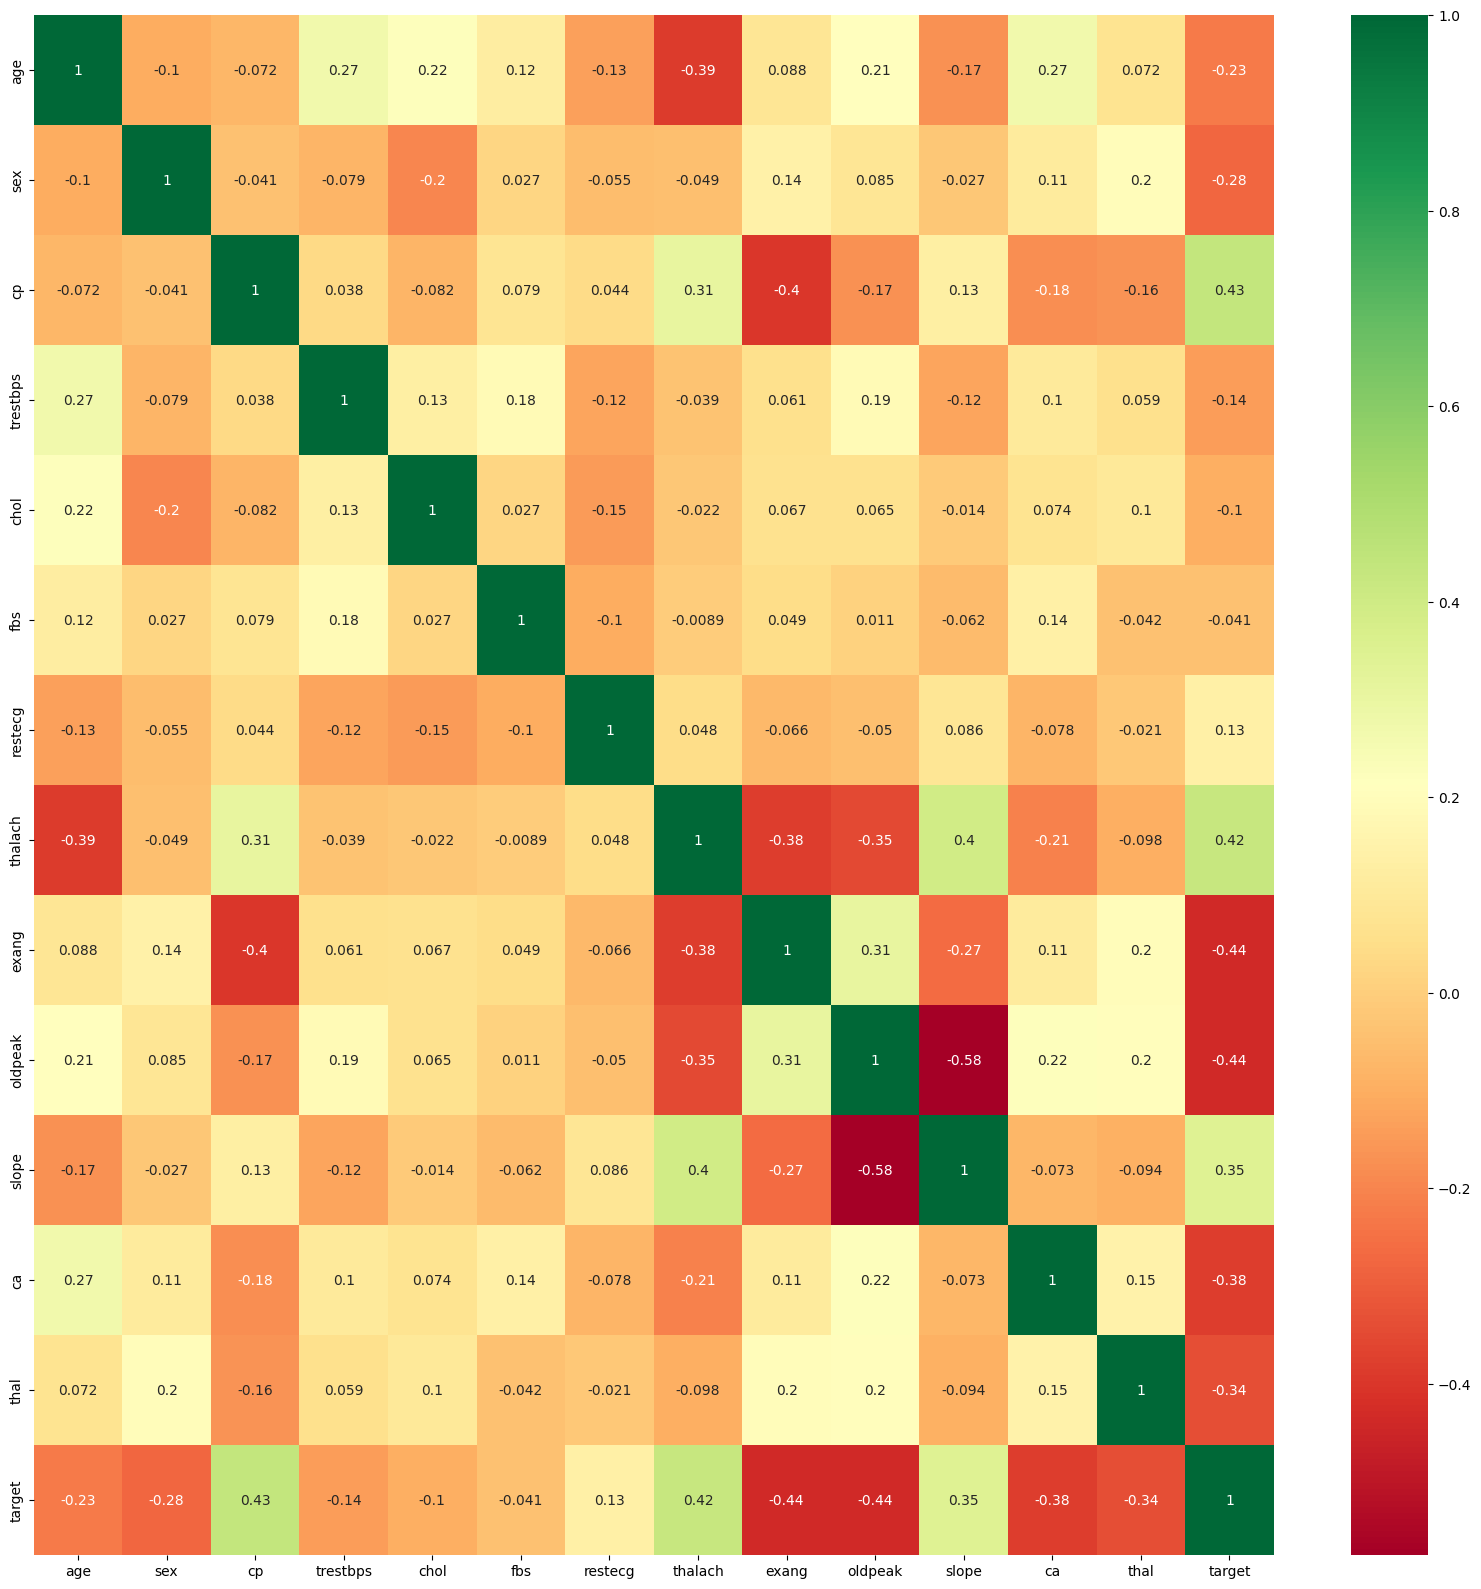

In [5]:
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

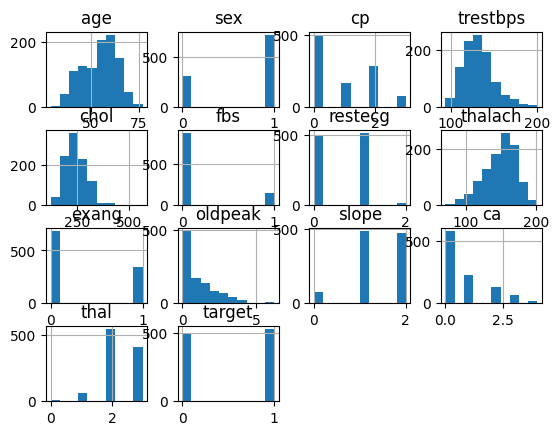

In [6]:
data.hist()

<Axes: xlabel='target', ylabel='count'>

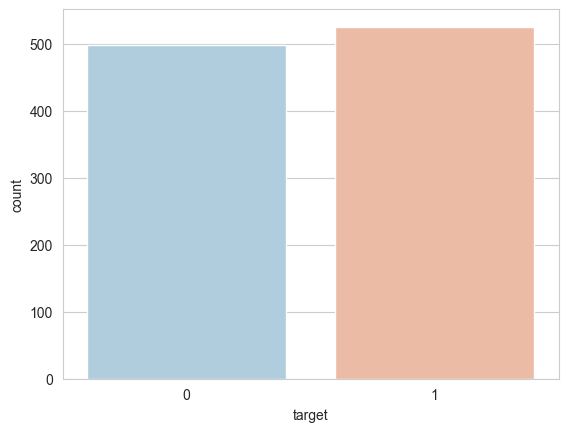

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

<h2>4. Data Processing</h2>

In [8]:
dataset = pd.get_dummies(data, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [10]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [11]:
y = dataset['target']
x = dataset.drop(['target'], axis=1)

In [12]:
from sklearn.model_selection import cross_val_score
knn_score = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,x,y,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbor Classifier scores for different K values')

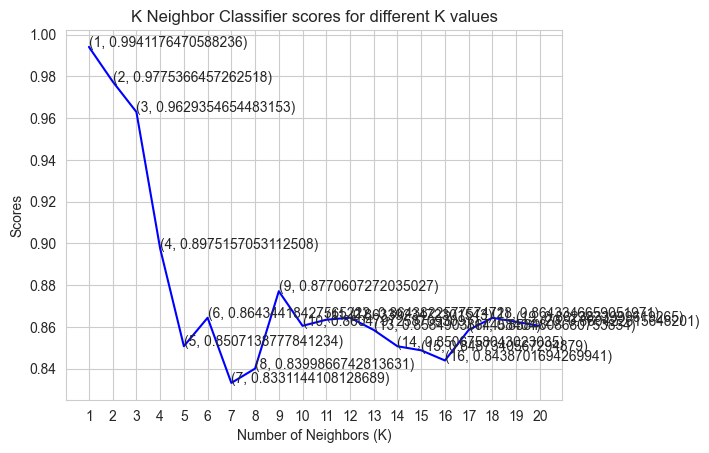

In [13]:
plt.plot([k for k in range(1,21)], knn_score, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbor Classifier scores for different K values')

<h2>5. Random Forest Classifier </h2>

In [14]:
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [15]:
score.mean()

0.992185417856463

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib

# Splitting dataset into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Splitting into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the trained model for later use
joblib.dump(model, "heart_disease_model.pkl")
print("Model saved as 'heart_disease_model.pkl'")


Model Accuracy: 98.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Model saved as 'heart_disease_model.pkl'
